In [1]:
import csv

def intRow(row):
    temp = []
    for t in row:
        temp.append(int(t))
    return temp

def read_x(address):
    reader = csv.reader(open(address))
    x= [intRow(row) for row in reader]
    return x

def read_y(address):
    reader = csv.reader(open(address))
    list=[intRow(row) for row in reader]
    y=sum(list,[])
    return y

X_0 = read_x('X.csv')
Y = read_y('Y.csv')

def NormalLine(row):
    total = sum(row[-4:])
    if total == 0:
        total = 1
    return [i/total for i in row]

def differences(row):
    total_list = row[-4:]
    num_list = row[:-4]
    differences_list = []
    for i in range(int(len(num_list)/4)-1):
        t1=num_list[i*4:(i+1)*4]
        t2=num_list[(i+1)*4:(i+2)*4]
        differences_list += [t2[j]-t1[j] for j in range(len(t1))]
       
    return num_list + differences_list +total_list

X = [differences(NormalLine(row)) for row in X_0]

In [2]:
random_seed = 12345
from sklearn.model_selection import train_test_split
x_random_train, x_test, y_random_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=random_seed)

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=random_seed)
x_under_train, y_under_train = rus.fit_resample(x_random_train, y_random_train)

from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=random_seed)
x_smote_train, y_smote_train = sm.fit_resample(x_random_train, y_random_train)

In [3]:

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

def print_metrics(title,y_true,y_pre):
    print(title+" dead",end = " ")
    print("recall %.2f"%recall_score(y_true, y_pre),end =" ")
    print("precision %.2f"%precision_score(y_true, y_pre),end=" ")
    print("f1_score %.2f"%f1_score(y_true, y_pre))
    
    y_flip_true = [0 if i else 1 for i in y_true]
    y_flip_pre = [0 if i else 1 for i in y_pre]
    
    print(title+" alive",end = " ")
    print("recall %.2f"%recall_score(y_flip_true, y_flip_pre),end =" ")
    print("precision %.2f"%precision_score(y_flip_true, y_flip_pre),end=" ")
    print("f1_score %.2f"%f1_score(y_flip_true, y_flip_pre))

y_pre_random_zeroR = [0 for i in range(len(y_test))]
y_pre_under_zeroR = [0 for i in range(len(y_test))]
y_pre_smote_zeroR = [0 for i in range(len(y_test))]

print_metrics("ZeroR underSampling",y_test,y_pre_under_zeroR)
print_metrics("ZeroR smote",y_test,y_pre_smote_zeroR)
print_metrics("ZeroR random",y_test,y_pre_random_zeroR)


ZeroR underSampling dead recall 0.00 precision 0.00 f1_score 0.00
ZeroR underSampling alive recall 1.00 precision 0.73 f1_score 0.84
ZeroR smote dead recall 0.00 precision 0.00 f1_score 0.00
ZeroR smote alive recall 1.00 precision 0.73 f1_score 0.84
ZeroR random dead recall 0.00 precision 0.00 f1_score 0.00
ZeroR random alive recall 1.00 precision 0.73 f1_score 0.84


D:\Anaconda\envs\NLP\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\envs\NLP\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\envs\NLP\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [4]:
from sklearn.neighbors import KNeighborsClassifier

knn_random = KNeighborsClassifier(n_neighbors=1,p=1)
knn_random.fit(x_random_train, y_random_train)
y_pre_random_knn = knn_random.predict(x_test)

knn_under = KNeighborsClassifier(n_neighbors=9,p=1)
knn_under.fit(x_under_train, y_under_train)
y_pre_under_knn = knn_under.predict(x_test)

knn_smote = KNeighborsClassifier(n_neighbors=9,p=1)
knn_smote.fit(x_smote_train, y_smote_train)
y_pre_smote_knn = knn_smote.predict(x_test)

print_metrics("Knn underSampling",y_test,y_pre_under_knn)
print_metrics("Knn smote",y_test,y_pre_smote_knn)
print_metrics("Knn random",y_test,y_pre_random_knn)

Knn underSampling dead recall 0.44 precision 0.54 f1_score 0.49
Knn underSampling alive recall 0.86 precision 0.81 f1_score 0.83
Knn smote dead recall 0.59 precision 0.47 f1_score 0.52
Knn smote alive recall 0.75 precision 0.83 f1_score 0.79
Knn random dead recall 0.35 precision 0.51 f1_score 0.42
Knn random alive recall 0.88 precision 0.79 f1_score 0.83


In [5]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,ComplementNB
from sklearn.preprocessing import MinMaxScaler

GaussianNB_random = GaussianNB()
GaussianNB_random.fit(x_random_train, y_random_train)
y_pre_random_GNB = GaussianNB_random.predict(x_test)

GaussianNB_under = GaussianNB()
GaussianNB_under.fit(x_under_train, y_under_train)
y_pre_under_GNB = GaussianNB_under.predict(x_test)

GaussianNB_smote = GaussianNB()
GaussianNB_smote.fit(x_smote_train, y_smote_train)
y_pre_smote_GNB = GaussianNB_smote.predict(x_test)


print_metrics("NB underSampling",y_test,y_pre_under_GNB)
print_metrics("NB smote",y_test,y_pre_smote_GNB)
print_metrics("NB random",y_test,y_pre_random_GNB)


NB underSampling dead recall 0.42 precision 0.48 f1_score 0.45
NB underSampling alive recall 0.83 precision 0.79 f1_score 0.81
NB smote dead recall 0.42 precision 0.47 f1_score 0.45
NB smote alive recall 0.83 precision 0.79 f1_score 0.81
NB random dead recall 0.39 precision 0.49 f1_score 0.44
NB random alive recall 0.85 precision 0.79 f1_score 0.82


In [6]:
from sklearn.neural_network import MLPClassifier

MLP_under = MLPClassifier(hidden_layer_sizes=(100,100,100),activation='logistic',max_iter=300)
MLP_under.fit(x_under_train, y_under_train)
y_pre_under_MLP = MLP_under.predict(x_test)

MLP_smote = MLPClassifier(hidden_layer_sizes=(100,100,100),activation='logistic',max_iter=300)
MLP_smote.fit(x_smote_train, y_smote_train)
y_pre_smote_MLP = MLP_smote.predict(x_test)

MLP_random = MLPClassifier(hidden_layer_sizes=(100,100,100),activation='logistic',max_iter=300)
MLP_random.fit(x_random_train, y_random_train)
y_pre_random_MLP = MLP_random.predict(x_test)

print_metrics("MLP underSampling",y_test,y_pre_under_MLP)
print_metrics("MLP smote",y_test,y_pre_smote_MLP)
print_metrics("MLP random",y_test,y_pre_random_MLP)

MLP underSampling dead recall 0.62 precision 0.44 f1_score 0.51
MLP underSampling alive recall 0.70 precision 0.83 f1_score 0.76
MLP smote dead recall 0.68 precision 0.42 f1_score 0.52
MLP smote alive recall 0.65 precision 0.85 f1_score 0.73
MLP random dead recall 0.40 precision 0.53 f1_score 0.45
MLP random alive recall 0.87 precision 0.80 f1_score 0.83


In [7]:
from sklearn.ensemble import RandomForestClassifier

rf_under = RandomForestClassifier(random_state=random_seed,n_estimators=200,criterion='gini')
rf_under.fit(x_under_train, y_under_train)
y_pre_under_rf = rf_under.predict(x_test)

rf_smote = RandomForestClassifier(random_state=random_seed,n_estimators=200,criterion='gini')
rf_smote.fit(x_smote_train, y_smote_train)
y_pre_smote_rf = rf_smote.predict(x_test)

rf_random = RandomForestClassifier(random_state=random_seed,n_estimators=200,criterion='gini')
rf_random.fit(x_random_train, y_random_train)
y_pre_random_rf = rf_random.predict(x_test)

print_metrics("RandomForeset underSampling",y_test,y_pre_under_rf)
print_metrics("RandomForeset smote",y_test,y_pre_smote_rf)
print_metrics("RandomForeset random",y_test,y_pre_random_rf)


RandomForeset underSampling dead recall 0.85 precision 0.47 f1_score 0.60
RandomForeset underSampling alive recall 0.64 precision 0.92 f1_score 0.76
RandomForeset smote dead recall 0.63 precision 0.51 f1_score 0.56
RandomForeset smote alive recall 0.77 precision 0.85 f1_score 0.81
RandomForeset random dead recall 0.38 precision 0.58 f1_score 0.46
RandomForeset random alive recall 0.90 precision 0.80 f1_score 0.85


In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


input_length = len(x_random_train[0])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

Epoch 1/20
99/99 [==============================] - 6s 30ms/step - loss: 0.6645 - accuracy: 0.6223 - recall_3: 0.0110 - val_loss: 1.0094 - val_accuracy: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 2/20
99/99 [==============================] - 2s 22ms/step - loss: 0.6625 - accuracy: 0.6252 - recall_3: 0.0000e+00 - val_loss: 0.9225 - val_accuracy: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 3/20
99/99 [==============================] - 2s 22ms/step - loss: 0.6598 - accuracy: 0.6252 - recall_3: 0.0000e+00 - val_loss: 0.9513 - val_accuracy: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 4/20
99/99 [==============================] - 2s 22ms/step - loss: 0.6514 - accuracy: 0.6277 - recall_3: 0.0297 - val_loss: 0.8960 - val_accuracy: 0.0482 - val_recall_3: 0.0482
Epoch 5/20
99/99 [==============================] - 2s 22ms/step - loss: 0.6438 - accuracy: 0.6391 - recall_3: 0.1602 - val_loss: 1.0255 - val_accuracy: 0.0495 - val_recall_3: 0.0495
Epoch 6/20
99/99 [==============================] - 2

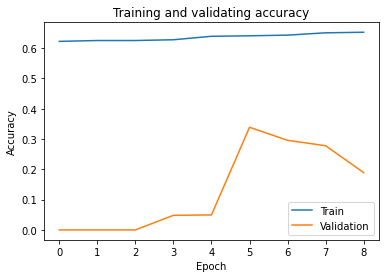

94/94 [==============================] - 2s 11ms/step
lstm underSampling dead recall 0.21 precision 0.50 f1_score 0.30
lstm underSampling alive recall 0.92 precision 0.76 f1_score 0.83


In [13]:
lstm = keras.Sequential()
lstm.add(layers.LSTM(units=100, activation='tanh', return_sequences=True, input_shape=(input_length, 1)))
lstm.add(layers.Dropout(0.5))
lstm.add(layers.LSTM(units=100, activation='tanh', return_sequences=False))
lstm.add(layers.Dropout(0.5))
lstm.add(layers.Dense(1, activation='sigmoid'))

lstm.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy',tf.keras.metrics.Recall()])

history_lstm = lstm.fit(np.array(x_under_train), np.array(y_under_train),validation_split=0.2,callbacks=[callback],epochs=20)
plt.plot(history_lstm.history['accuracy'], label='Train')
plt.plot(history_lstm.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Training and validating accuracy')
plt.legend()
plt.show()

y_pre_under_lstm = (lstm.predict(x_test) > 0.5).astype("int32").flatten()
print_metrics("lstm underSampling",y_test,y_pre_under_lstm.tolist())

Epoch 1/20
252/252 [==============================] - 9s 26ms/step - loss: 0.6646 - accuracy: 0.6239 - recall_4: 0.0033 - val_loss: 0.9647 - val_accuracy: 0.0000e+00 - val_recall_4: 0.0000e+00
Epoch 2/20
252/252 [==============================] - 5s 22ms/step - loss: 0.6521 - accuracy: 0.6296 - recall_4: 0.0518 - val_loss: 0.9495 - val_accuracy: 0.1264 - val_recall_4: 0.1264
Epoch 3/20
252/252 [==============================] - 6s 22ms/step - loss: 0.6394 - accuracy: 0.6396 - recall_4: 0.2080 - val_loss: 0.8481 - val_accuracy: 0.3547 - val_recall_4: 0.3547
Epoch 4/20
252/252 [==============================] - 6s 22ms/step - loss: 0.6376 - accuracy: 0.6484 - recall_4: 0.2405 - val_loss: 1.0806 - val_accuracy: 0.0378 - val_recall_4: 0.0378
Epoch 5/20
252/252 [==============================] - 6s 22ms/step - loss: 0.6348 - accuracy: 0.6497 - recall_4: 0.2306 - val_loss: 0.9685 - val_accuracy: 0.1463 - val_recall_4: 0.1463
Epoch 6/20
252/252 [==============================] - 6s 22ms/step 

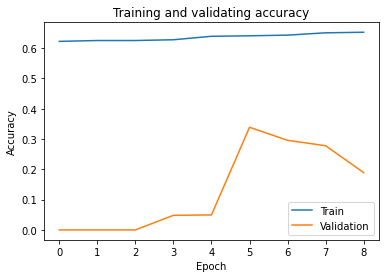

94/94 [==============================] - 2s 12ms/step
lstm smote dead recall 0.28 precision 0.47 f1_score 0.35
lstm smote alive recall 0.88 precision 0.77 f1_score 0.82


In [14]:
lstm3 = keras.Sequential()
lstm3.add(layers.LSTM(units=100, activation='tanh', return_sequences=True, input_shape=(input_length, 1)))
lstm3.add(layers.Dropout(0.5))
lstm3.add(layers.LSTM(units=100, activation='tanh', return_sequences=False))
lstm3.add(layers.Dropout(0.5))
lstm3.add(layers.Dense(1, activation='sigmoid'))

lstm3.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy',tf.keras.metrics.Recall()])

history_lstm3 = lstm3.fit(np.array(x_smote_train), np.array(y_smote_train),validation_split=0.2,callbacks=[callback],epochs=20)
plt.plot(history_lstm.history['accuracy'], label='Train')
plt.plot(history_lstm.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Training and validating accuracy')
plt.legend()
plt.show()

y_pre_smote_lstm = (lstm3.predict(x_test) > 0.5).astype("int32").flatten()
print_metrics("lstm smote",y_test,y_pre_smote_lstm.tolist())

Epoch 1/20
175/175 [==============================] - 8s 29ms/step - loss: 0.6019 - accuracy: 0.7146 - recall_5: 0.0038 - val_loss: 0.5904 - val_accuracy: 0.7227 - val_recall_5: 0.0000e+00
Epoch 2/20
175/175 [==============================] - 4s 23ms/step - loss: 0.5933 - accuracy: 0.7175 - recall_5: 0.0000e+00 - val_loss: 0.5818 - val_accuracy: 0.7227 - val_recall_5: 0.0000e+00
Epoch 3/20
175/175 [==============================] - 4s 23ms/step - loss: 0.5834 - accuracy: 0.7186 - recall_5: 0.0297 - val_loss: 0.5701 - val_accuracy: 0.7205 - val_recall_5: 0.0103
Epoch 4/20
175/175 [==============================] - 4s 22ms/step - loss: 0.5730 - accuracy: 0.7214 - recall_5: 0.0519 - val_loss: 0.5650 - val_accuracy: 0.7212 - val_recall_5: 0.0619
Epoch 5/20
175/175 [==============================] - 4s 22ms/step - loss: 0.5707 - accuracy: 0.7184 - recall_5: 0.0627 - val_loss: 0.5655 - val_accuracy: 0.7169 - val_recall_5: 0.1521
Epoch 6/20
175/175 [==============================] - 4s 22ms/s

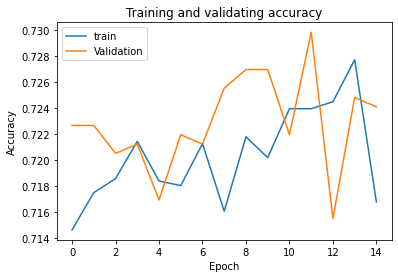

94/94 [==============================] - 2s 11ms/step
lstm random dead recall 0.09 precision 0.52 f1_score 0.16
lstm random alive recall 0.97 precision 0.74 f1_score 0.84


In [15]:
lstm2 = keras.Sequential()
lstm2.add(layers.LSTM(units=100, activation='tanh', return_sequences=True, input_shape=(input_length, 1)))
lstm2.add(layers.Dropout(0.2))
lstm2.add(layers.LSTM(units=100, activation='tanh', return_sequences=False))
lstm2.add(layers.Dropout(0.2))
lstm2.add(layers.Dense(1, activation='sigmoid'))


lstm2.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy',tf.keras.metrics.Recall()])

history_lstm2 = lstm2.fit(np.array(x_random_train), np.array(y_random_train),validation_split=0.2,callbacks=[callback], epochs=20)
plt.plot(history_lstm2.history['accuracy'], label='train')
plt.plot(history_lstm2.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Training and validating accuracy')
plt.legend()
plt.show()

y_pre_random_lstm = (lstm2.predict(x_test) > 0.5).astype("int32").flatten()
print_metrics("lstm random",y_test,y_pre_random_lstm.tolist())

In [12]:
balance_pre_list = [y_pre_under_zeroR,
                    y_pre_under_knn,
                    y_pre_under_GNB,
                    y_pre_under_MLP,
                    y_pre_under_rf,
                    y_pre_under_lstm.tolist()
                    ]

balance_2_pre_list = [y_pre_smote_zeroR,
                      y_pre_smote_knn,
                      y_pre_smote_GNB,
                      y_pre_smote_MLP,
                      y_pre_smote_rf,
                      y_pre_smote_lstm.tolist()
                      ]

random_pre_list = [y_pre_random_zeroR,
                   y_pre_random_knn,
                   y_pre_random_GNB,
                   y_pre_random_MLP,
                   y_pre_random_rf,
                   y_pre_random_lstm.tolist()
                   ]

test_list = [y_test,y_test,y_test]
pre_list =[balance_pre_list, balance_2_pre_list,random_pre_list]

def get_metrics(y_true,y_pre):    
    result1=[recall_score(y_true, y_pre),
             precision_score(y_true, y_pre),
             f1_score(y_true, y_pre)]
    
    y_flip_true = [0 if i else 1 for i in y_true]
    y_flip_pre = [0 if i else 1 for i in y_pre]
    
    result2=[recall_score(y_flip_true, y_flip_pre),
             precision_score(y_flip_true, y_flip_pre),
             f1_score(y_flip_true, y_flip_pre)]
    
    return result1,result2

result= []
for i in range(len(test_list)):
    test_y = test_list[i]
    pre_y_list = pre_list[i]
    result_list1=[]
    result_list2=[]
    for pre_y in pre_y_list:
        result1,result2 = get_metrics(test_y,pre_y)
        result_list1+=result1
        result_list2+=result2
    result.append(result_list1)
    result.append(result_list2)

with open('./result/diffpercent_result.csv', 'w',newline='') as f:
    print("writing..")
    writer = csv.writer(f)
    for row in result:
        writer.writerow(row)
print("finish..")


D:\Anaconda\envs\NLP\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\envs\NLP\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\envs\NLP\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


writing..
finish..


D:\Anaconda\envs\NLP\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
